<a href="https://colab.research.google.com/github/ZixrZakuga/Pengolahan_Citra_D/blob/main/PCD_Tugas8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soal 1: Jenis-Jenis Tepi

1. Penjelasan Empat Jenis Tepi dalam Citra Digital


*   Tepi Curam (Step Edge): Perubahan intensitas mendadak terjadi dalam jarak pendek.
*   Tepi Landai (Ramp Edge): Perubahan intensitas terjadi secara bertahap.
*   Tepi Garis (Line Edge): Intensitas berubah secara signifikan di sekitar garis tipis.
*   Tepi Atap (Roof Edge): Perubahan intensitas membentuk puncak (seperti segitiga terbalik).

2. Contoh-contohnya

*  Tepi Curam (Step Edge): Perbatasan antara tembok putih dan pintu gelap.

*  Tepi Landai (Ramp Edge): Bayangan yang memudar di atas lantai.
*  Tepi Garis (Line Edge) : Kabel listrik hitam yang terlihat di latar langit cerah.
*  Tepi Atap (Roof Edge): Atap bangunan yang memiliki pola berundak.
3. Mengapa Tepi dengan Derau Memerlukan Pendekatan Khusus?
Tepi dengan derau sulit dideteksi karena gangguan noise sering kali menyerupai tepi palsu. Pendekatan khusus, seperti smoothing (contohnya Gaussian filter), diperlukan untuk mengurangi noise sebelum mendeteksi tepi agar hasil lebih akurat.

# Soal 2: Implementasi Operator Gradien

Operator Sobel (Implementasi Python):

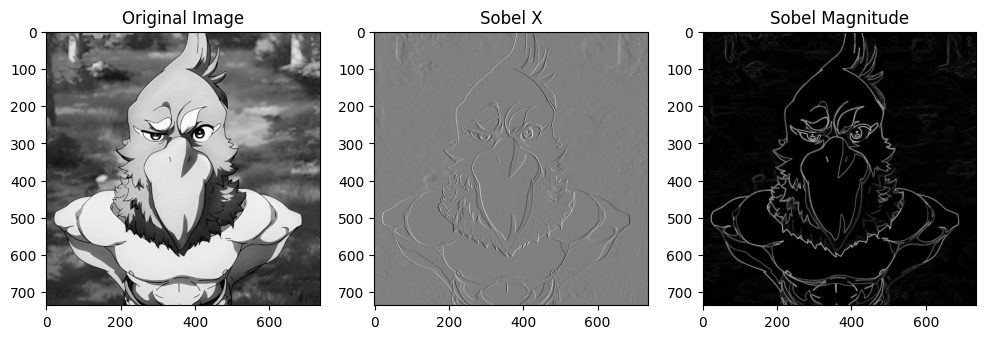

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra grayscale
image = cv2.imread('/content/drive/MyDrive/Kuliah/CItra Digital/Sunraku1.jpeg', cv2.IMREAD_GRAYSCALE)

# Operator Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalisasi hasil
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Menampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Sobel X")
plt.imshow(sobel_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Sobel Magnitude")
plt.imshow(sobel_magnitude, cmap='gray')
plt.show()



Langkah-Langkah Implementasi


* Membaca Citra: Gambar dibaca dalam format grayscale untuk mempermudah pengolahan.
*   Menerapkan Sobel pada Sumbu X dan Y: Gradien dihitung untuk mendeteksi perubahan intensitas.
*  Menggabungkan Gradien: Menggunakan magnitudo gradien untuk memperoleh tepi akhir.
*  Normalisasi: Hasil diproses untuk memastikan nilai berada dalam rentang tampilan yang sesuai.
*   Visualisasi: Citra asli dan hasil deteksi tepi ditampilkan untuk analisis.











# Soal 3. Perbandingan Operator Pendeteksi Tepi

1. Akurasi Pendeteksian


*   Sobel: Akurasinya baik untuk mendeteksi tepi dengan perubahan intensitas yang signifikan. Namun, hasilnya kurang presisi untuk tepi yang kompleks atau citra yang mengandung noise.
*   Prewitt:
Akurasi sedikit lebih rendah dibandingkan Sobel karena operator ini menggunakan bobot yang lebih sederhana. Cocok untuk deteksi tepi dasar.
*   Canny:
Akurasinya tinggi karena menggunakan beberapa langkah, seperti smoothing dengan Gaussian filter, kalkulasi gradien, dan penentuan threshold adaptif. Canny sangat baik untuk mendeteksi tepi dengan presisi tinggi, termasuk pada citra yang mengandung noise.
2. Kompleksitas Komputasi
*   Sobel:
Kompleksitas rendah karena hanya menggunakan operasi gradien sederhana. Cocok untuk aplikasi yang memerlukan kecepatan dan efisiensi.
*   Prewitt:
Kompleksitasnya juga rendah, bahkan sedikit lebih sederhana dibanding Sobel, karena bobot kernel lebih ringan.
*   Canny:
Kompleksitasnya tinggi karena terdiri dari beberapa tahapan, termasuk smoothing, deteksi gradien, non-maximum suppression, dan thresholding. Ini membuat operator ini lebih lambat dibandingkan Sobel atau Prewitt.
3. Situasi di Mana Operator Canny Lebih Direkomendasikan
Operator Canny lebih direkomendasikan dalam situasi berikut:
*   Citra Mengandung Noise: Canny menggunakan smoothing untuk mengurangi efek noise, sehingga menghasilkan tepi yang lebih bersih.
*   Kebutuhan Akurasi Tinggi: Canny cocok untuk aplikasi yang memerlukan pendeteksian tepi dengan presisi tinggi, seperti pengenalan pola atau segmentasi objek.
*   Struktur Tepi yang Kompleks: Canny mampu mendeteksi tepi yang halus atau detail kecil dengan baik.
*   Ketebalan Tepi Konsisten: Canny memberikan hasil dengan ketebalan satu piksel, sehingga cocok untuk analisis lebih lanjut.


# Soal 4: Pendeteksian Tepi pada Citra Noisy

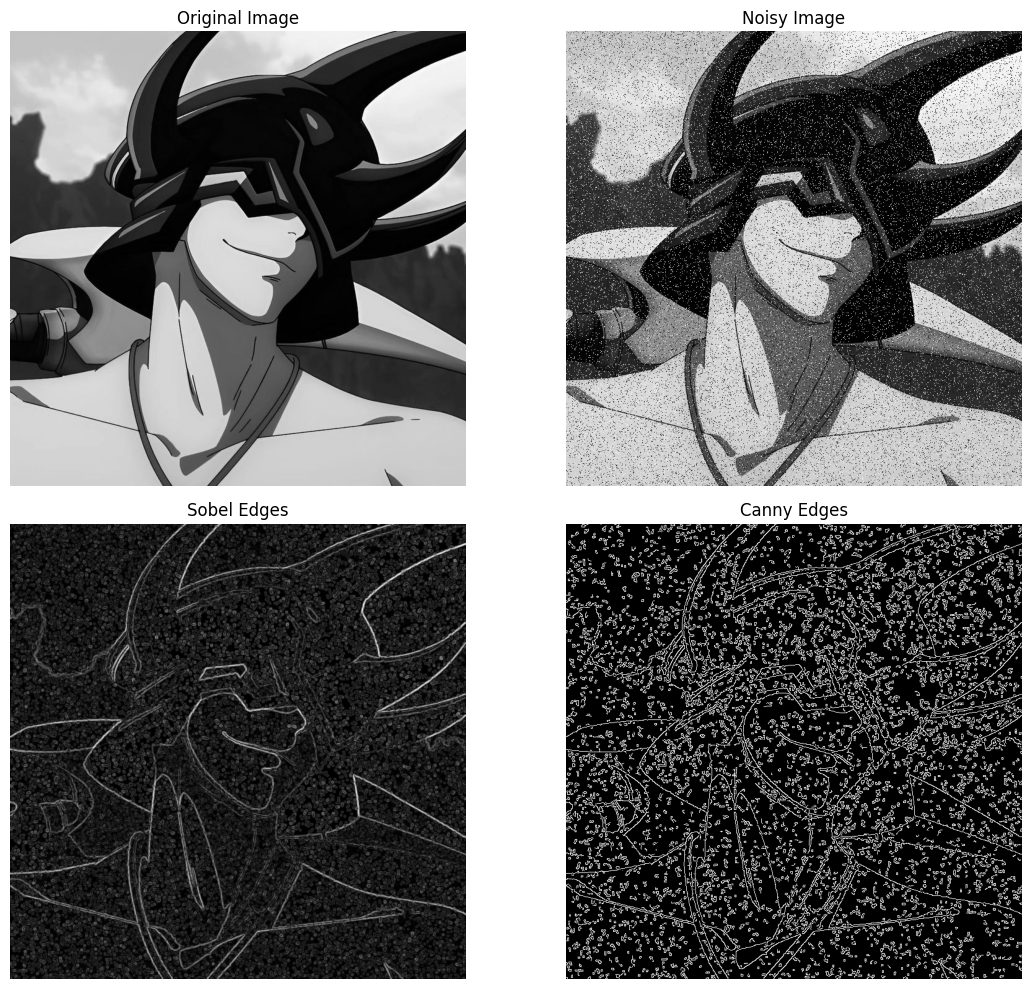

In [7]:

# Membaca citra dan menambahkan derau salt-and-pepper
image = cv2.imread('/content/drive/MyDrive/Kuliah/CItra Digital/sun2.jpeg', cv2.IMREAD_GRAYSCALE)
noisy_image = image.copy()
prob = 0.05  # Probabilitas noise
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        rand = np.random.rand()
        if rand < prob:
            noisy_image[i, j] = 0
        elif rand > 1 - prob:
            noisy_image[i, j] = 255

# Gaussian Smoothing
smoothed_image = cv2.GaussianBlur(noisy_image, (5, 5), 1)

# Deteksi Tepi Sobel
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_edges = cv2.normalize(sobel_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Deteksi Tepi Canny
canny_edges = cv2.Canny(smoothed_image, 100, 200)

# Menampilkan Hasil
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title("Sobel Edges")
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title("Canny Edges")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()



Analisis :
1. Sobel Edges:
* Cocok untuk tugas deteksi tepi cepat dengan fokus pada garis besar (kontur utama) saja.
* Kurang optimal untuk gambar dengan noise tinggi karena tidak memiliki mekanisme threshold untuk memfilter tepi palsu.

2. Canny Edges:
* Lebih unggul dalam mendeteksi tepi yang presisi, dengan detail halus yang lebih menyerupai gambar asli.
* Masih ada pengaruh noise, tetapi lebih sedikit dibandingkan Sobel karena proses Gaussian smoothing dan penggunaan ambang batas ganda.